# О наборе данных

Этот набор данных предназначен для прогнозирования стоимости поездок на такси на основе различных факторов.

- Trip_Distance_km: Расстояние (в километрах)
- Time_of_Day: время суток (утро, день, вечер, ночь)
- Day_of_Week: ден недели (будни, выходные)
- Passenger_Count: Количество пассажиров
- Traffic_Conditions: Интенсивность движения (легкое, среднее, интенсивное)
- Weather: погода (без осадков, дождь, снег)
- Base_Fare: базовый тариф
- Per_Km_Rate: стоимость за км
- Per_Minute_Rate: стоимость за мин
- Trip_Duration_Minutes: Продолжительность поедки в мин
- Trip_Price: Стоимость поездки

# Домашнее задание про практике 2

- Провести разведочный анализ EDA (описать полученный результат). Тут важно, влияет ли X[i] на Y (примеры в практике 2)
- Описать полученный результат относительно анализа целевой перменной и зависимой (см. практика 2)
- Подобороться с пропусками в данных (при наличии в датасете). Объяснить способ выборка борьбы с пропуском
- Обучить модель линейной регресии на всей выборке X, y. Вывести метрики
- Сделать train_test_split и обучить на обучающей выборке. Предсказать результат на обучающей и тестовой выборках. Вывести метрики, объяснить полученный результат

# Знакомство с датасетом и выбор  прогнозируемой переменной

In [77]:
!pip install pandas seaborn scikit-learn

In [78]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [79]:
PATH_TO_FILE: str = '/content/taxi_trip_pricing.csv' # Загрузка набора данных
## p.s. в левой панеле нажать на папку и перетащить туда файл,
## а wince.csv заменить на свой вариант (ПКМ -> копировать путь)

df = pd.read_csv(PATH_TO_FILE) # функция превращение данных из CSV в DataFrame

In [80]:
df

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180
...,...,...,...,...,...,...,...,...,...,...,...
995,5.49,Afternoon,Weekend,4.0,Medium,Clear,2.39,0.62,0.49,58.39,34.4049
996,45.95,Night,Weekday,4.0,Medium,Clear,3.12,0.61,NaN,61.96,62.1295
997,7.70,Morning,Weekday,3.0,Low,Rain,2.08,1.78,NaN,54.18,33.1236
998,47.56,Morning,Weekday,1.0,Low,Clear,2.67,0.82,0.17,114.94,61.2090


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


In [82]:
# преобразовать категориальные признаки в category
# df['column'] = df.column.astye('category')
df['Time_of_Day'] = df['Time_of_Day'].astype('category')
df['Day_of_Week'] = df['Day_of_Week'].astype('category')
df['Traffic_Conditions'] = df['Traffic_Conditions'].astype('category')
df['Weather'] = df['Weather'].astype('category')

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Trip_Distance_km       950 non-null    float64 
 1   Time_of_Day            950 non-null    category
 2   Day_of_Week            950 non-null    category
 3   Passenger_Count        950 non-null    float64 
 4   Traffic_Conditions     950 non-null    category
 5   Weather                950 non-null    category
 6   Base_Fare              950 non-null    float64 
 7   Per_Km_Rate            950 non-null    float64 
 8   Per_Minute_Rate        950 non-null    float64 
 9   Trip_Duration_Minutes  950 non-null    float64 
 10  Trip_Price             951 non-null    float64 
dtypes: category(4), float64(7)
memory usage: 59.3 KB


In [84]:
# выбрать целевую переменную и разделить на X, y
# целевая переменная - числовой непрерывный признак

y = df.Trip_Price
X = df.drop('Trip_Price', axis=1)

# EDA (разведочный анализ относительно целевой переменной)


## ЗАДАНИЕ
в этом же блоке побороться с проусками, важно сделать именно после разведочного анализа
- Y и категориальные
- Y и числовые
- Описать все полученные результаты в своем блоке

- Отобрать признаки для дальнейшего анализа, записать в ```best_features```

## Y и категориальные

In [85]:
df.describe(include='all')

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
count,950.000000,950,950,950.000000,950,950,950.000000,950.000000,950.000000,950.000000,951.000000
unique,NaN,4,2,NaN,3,3,NaN,NaN,NaN,NaN,NaN
top,NaN,Afternoon,Weekday,NaN,Low,Clear,NaN,NaN,NaN,NaN,NaN
freq,NaN,371,655,NaN,397,667,NaN,NaN,NaN,NaN,NaN
mean,27.070547,NaN,NaN,2.476842,NaN,NaN,3.502989,1.233316,0.292916,62.118116,56.874773
std,19.905300,NaN,NaN,1.102249,NaN,NaN,0.870162,0.429816,0.115592,32.154406,40.469791
min,1.230000,NaN,NaN,1.000000,NaN,NaN,2.010000,0.500000,0.100000,5.010000,6.126900
25%,12.632500,NaN,NaN,1.250000,NaN,NaN,2.730000,0.860000,0.190000,35.882500,33.742650
50%,25.830000,NaN,NaN,2.000000,NaN,NaN,3.520000,1.220000,0.290000,61.860000,50.074500
75%,38.405000,NaN,NaN,3.000000,NaN,NaN,4.260000,1.610000,0.390000,89.055000,69.099350


In [86]:
X.describe(include='all')

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes
count,950.000000,950,950,950.000000,950,950,950.000000,950.000000,950.000000,950.000000
unique,NaN,4,2,NaN,3,3,NaN,NaN,NaN,NaN
top,NaN,Afternoon,Weekday,NaN,Low,Clear,NaN,NaN,NaN,NaN
freq,NaN,371,655,NaN,397,667,NaN,NaN,NaN,NaN
mean,27.070547,NaN,NaN,2.476842,NaN,NaN,3.502989,1.233316,0.292916,62.118116
std,19.905300,NaN,NaN,1.102249,NaN,NaN,0.870162,0.429816,0.115592,32.154406
min,1.230000,NaN,NaN,1.000000,NaN,NaN,2.010000,0.500000,0.100000,5.010000
25%,12.632500,NaN,NaN,1.250000,NaN,NaN,2.730000,0.860000,0.190000,35.882500
50%,25.830000,NaN,NaN,2.000000,NaN,NaN,3.520000,1.220000,0.290000,61.860000
75%,38.405000,NaN,NaN,3.000000,NaN,NaN,4.260000,1.610000,0.390000,89.055000


Time_of_Day
Afternoon    371
Morning      283
Evening      203
Night         93
Name: count, dtype: int64


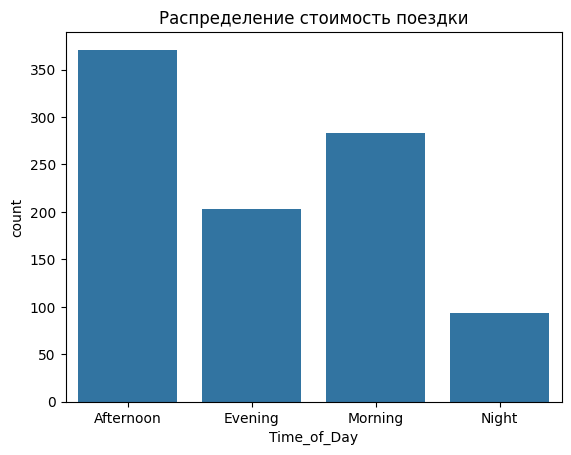

             count       mean        std      min      25%      50%       75%  \
Time_of_Day                                                                     
Afternoon    351.0  57.958716  43.432813   6.4729  33.3478  51.0300  69.73675   
Evening      197.0  56.404504  37.507576   8.6709  35.0028  48.4496  69.19380   
Morning      265.0  55.949429  37.786101   6.1269  33.3599  50.7312  68.37480   
Night         89.0  56.304401  39.712048  12.5567  35.8539  51.2721  67.73600   

                    max  
Time_of_Day              
Afternoon    329.913004  
Evening      296.088697  
Morning      325.098950  
Night        332.043689  


/tmp/ipython-input-4281769055.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby("Time_of_Day")["Trip_Price"].describe())


In [87]:
print(df["Time_of_Day"].value_counts())
sns.countplot(data=df, x="Time_of_Day")
plt.title("Распределение cтоимость поездки")
plt.show()

print(df.groupby("Time_of_Day")["Trip_Price"].describe())


**Пояснения по распределению cтоимость поездки:**

Чаще всего ездят утром (351 поездка). На втором месте утро (265)
Ночью почти никто не ездит (89 поездок)
То есть датасет несбалансированный → в основном ездят утром.

**По cтоимости поездки в зависимости от времени суток:**

Днем средний cтоимость поездки ≈ 57.96 (самый высокий показатель).
Вечером и ночью средняя стоимост поезди почти одинаковая ≈ 56.4 и 56.3
Утром средняя стоимость поездки немного меньше ≈ 55.9
Самая высокая минимальная и максимальная стоимость поездки ночью

Вывод:
Средняя у них почти одинаковая можно предположить, что время суток несильно влияет на стоимост поездки.
Распределение сильно «сосредоточено» на значениях утро и день, так что модель будет предсказывать их чаще.

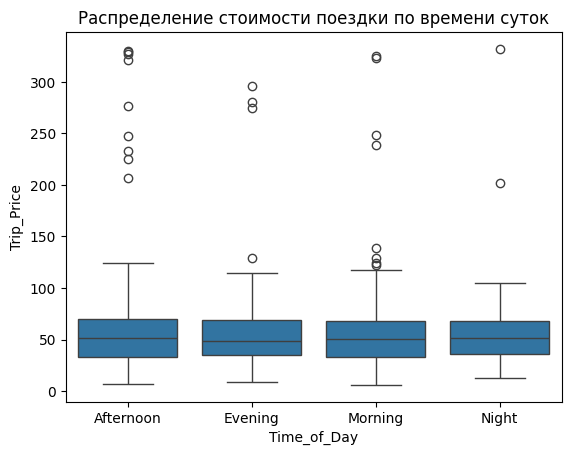

In [88]:
sns.boxplot(data=df, x="Time_of_Day", y="Trip_Price")
plt.title("Распределение стоимости поездки по времени суток")
plt.show()

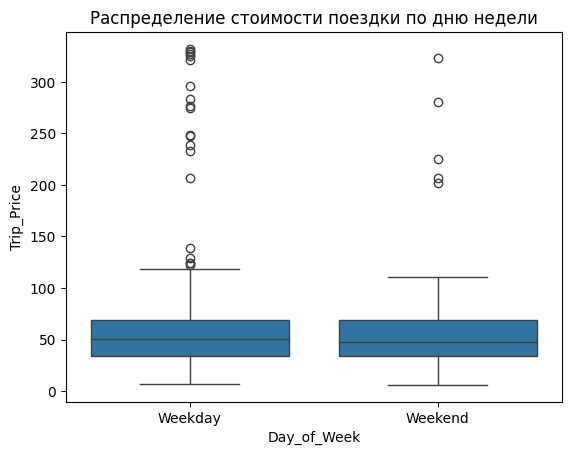

In [89]:
sns.boxplot(data=df, x="Day_of_Week", y="Trip_Price")
plt.title("Распределение стоимости поездки по дню недели")
plt.show()

Вывод: Средняя у них почти одинаковая можно предположить, что день недели несильно влияет на стоимост поездки.

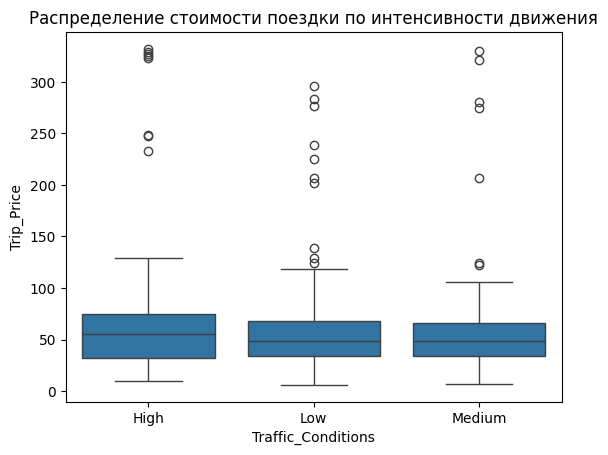

In [90]:
sns.boxplot(data=df, x="Traffic_Conditions", y="Trip_Price")
plt.title("Распределение стоимости поездки по интенсивности движения")
plt.show()

Вывод: видно, что средняя при высокой интесивности движения выше чем у низкой и средней, можно предположить, что чем выше интенсивность движения тем выше стоимость поездки.

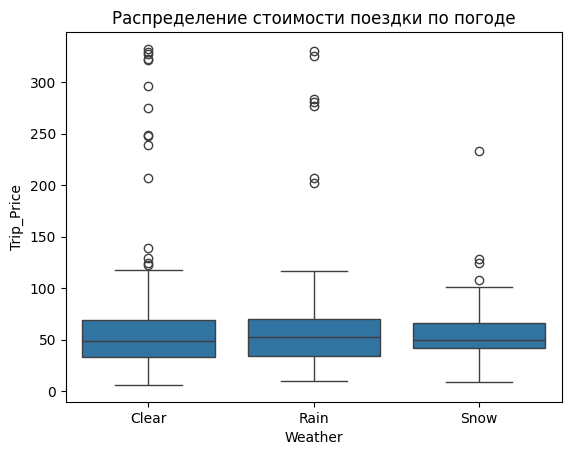

In [91]:
sns.boxplot(data=df, x="Weather", y="Trip_Price")
plt.title("Распределение стоимости поездки по погоде")
plt.show()

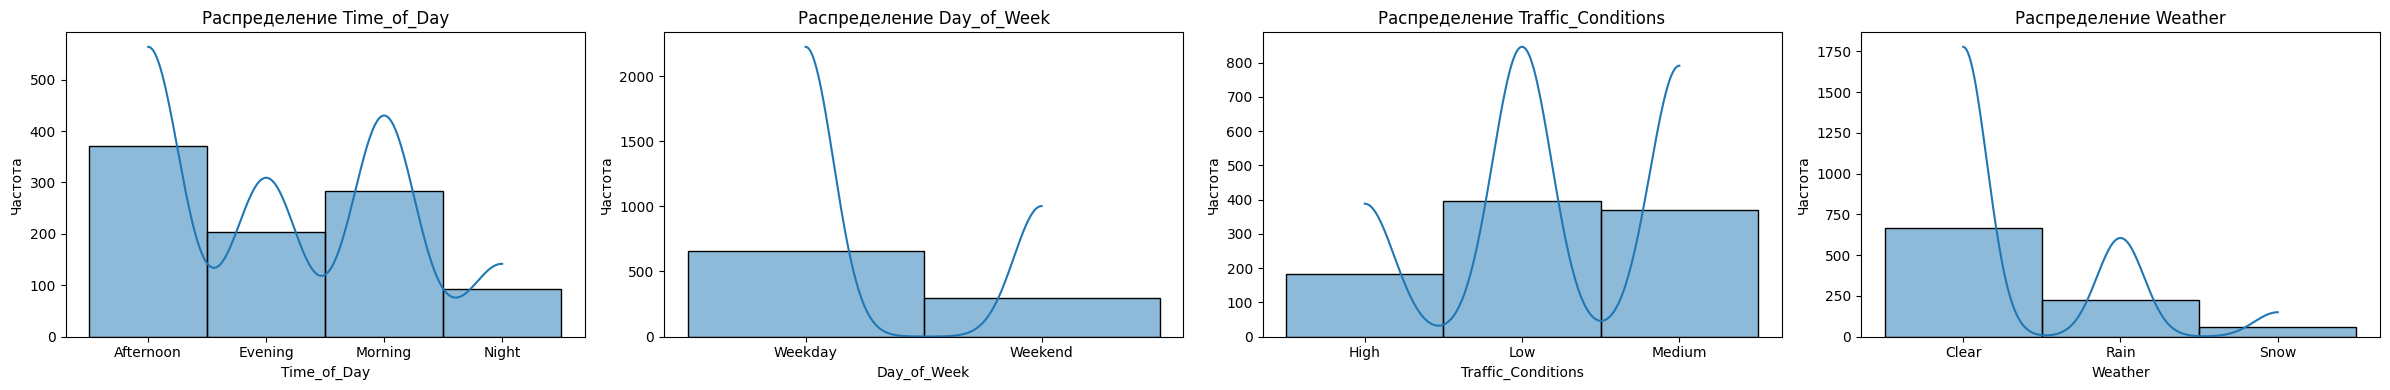

In [92]:
num_cols = df.select_dtypes(include='category').columns # или object
fig, axes = plt.subplots(1, len(num_cols), figsize=(6 * len(num_cols), 4))

for ax, col in zip(axes, num_cols):
    sns.histplot(df[col], kde=True, ax=ax)
    ax.set_title(f'Распределение {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Частота')

plt.tight_layout()
plt.show()

## Y и числовые

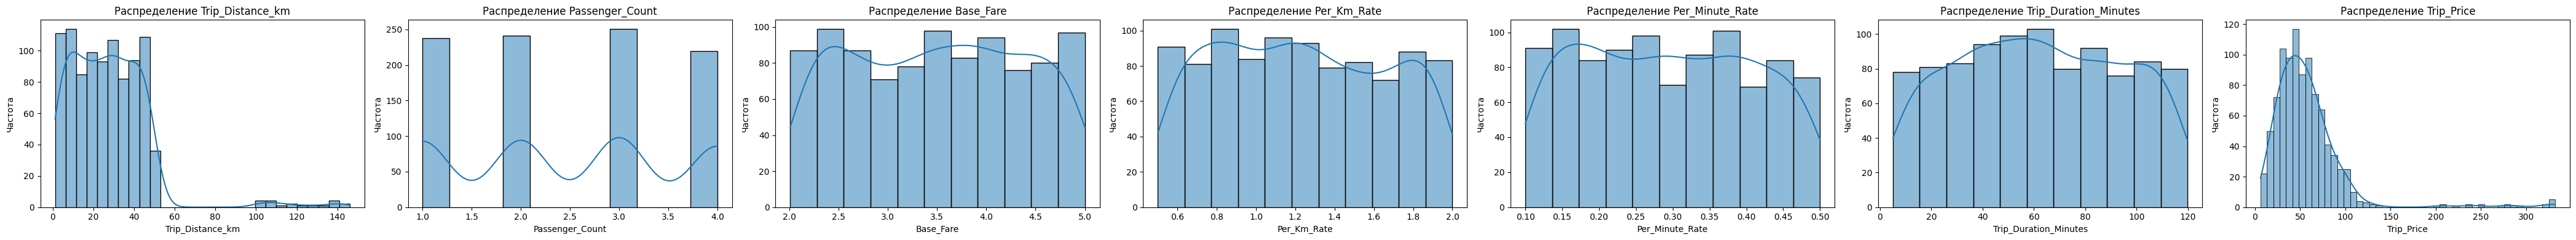

In [93]:
num_cols = df.select_dtypes(include='float64').columns # если есть int чиловая переменная либо + ['col1', 'col2'], либо такие колонки преобразовать во flaot
fig, axes = plt.subplots(1, len(num_cols), figsize=(6 * len(num_cols), 4))

for ax, col in zip(axes, num_cols):
    sns.histplot(df[col], kde=True, ax=ax)
    ax.set_title(f'Распределение {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Частота')

plt.tight_layout()
plt.show()

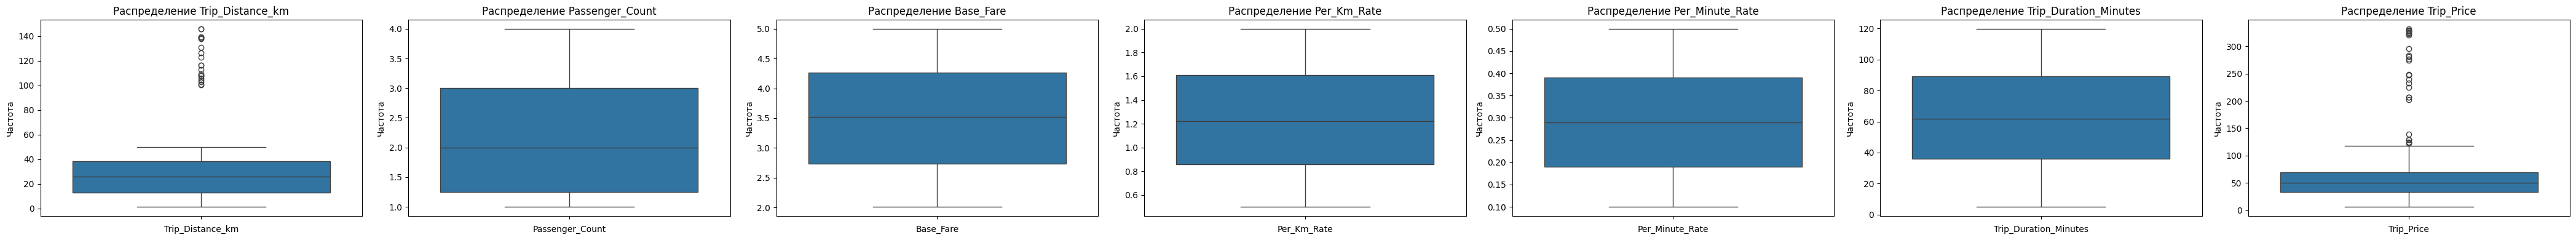

In [94]:
num_cols = df.select_dtypes(include='float64').columns # если есть int чиловая переменная либо + ['col1', 'col2'], либо такие колонки преобразовать во flaot
fig, axes = plt.subplots(1, len(num_cols), figsize=(6 * len(num_cols), 4))

for ax, col in zip(axes, num_cols):
    sns.boxplot(df[col], ax=ax)
    ax.set_title(f'Распределение {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Частота')

plt.tight_layout()
plt.show()

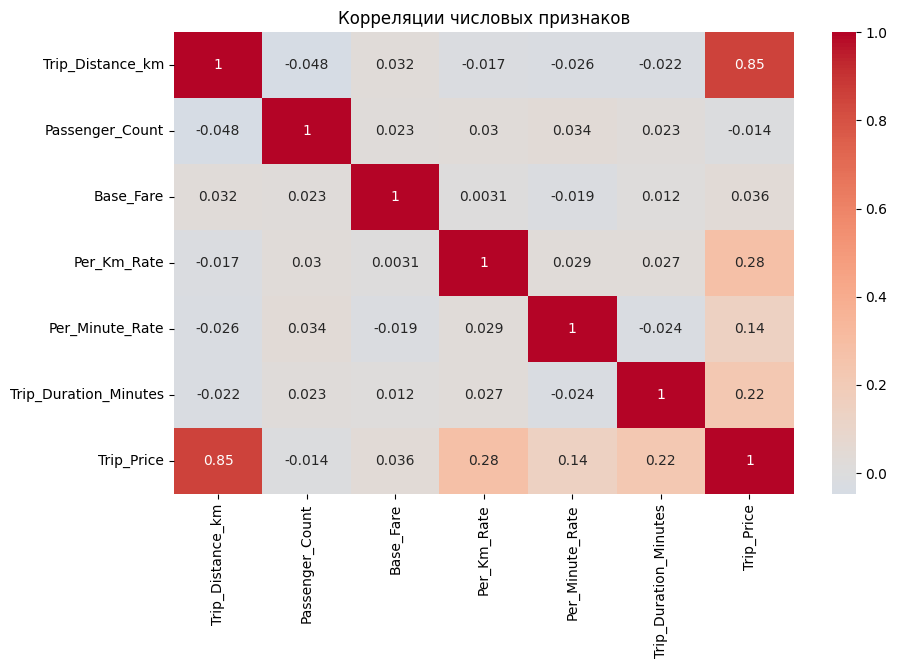

In [95]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", center=0)
plt.title("Корреляции числовых признаков")
plt.show()

Корреляции со стоимостью поездки:


- Trip_Distance_km: Расстояние (в километрах) **0.85** → сильная положительная, ем больше расстояние, тем больше стоимость поездки
- Per_Km_Rate: стоимость за км **0.28** слабая положителная, чем больше стоимость за км, тем болше стоимость поездки
- Trip_Duration_Minutes: Продолжительность поедки в мин **0.22** слабая положителная, чем больше продолжительность поездки в мин, тем болше стоимость поездки
- Per_Minute_Rate: стоимость за мин **0.14**  → очень слабая положительная
- Passenger_Count: **-0.014** → поти не влияет
- Base_Fare: **0.036** → почти не влияет

/tmp/ipython-input-1930676146.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("coolwarm")


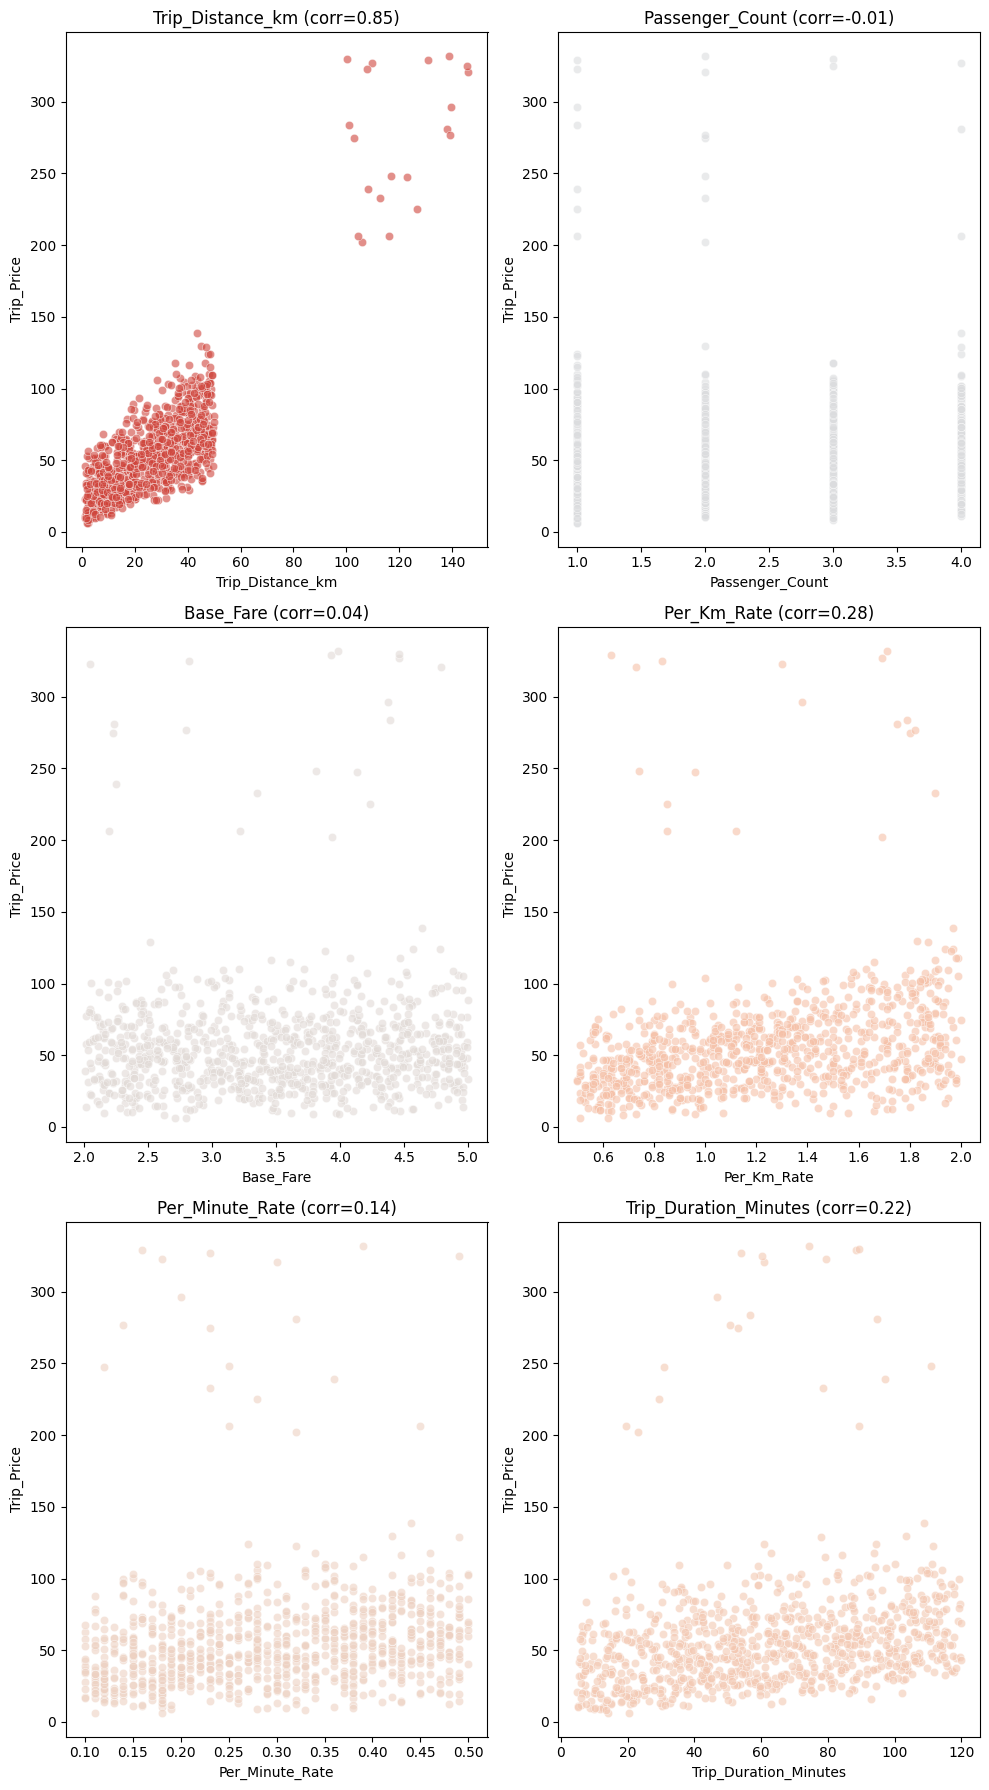

In [96]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

num_features = X.select_dtypes(include="number").columns
n = len(num_features)

# корреляции с alcohol
corrs = df[num_features].corrwith(df["Trip_Price"])

# палитра (от синего до красного)
cmap = plt.cm.get_cmap("coolwarm")

# сетка графиков (2 в строку)
fig, axes = plt.subplots(nrows=(n+1)//2, ncols=2, figsize=(10, n*3))
axes = axes.flatten()

for i, col in enumerate(num_features):
    corr = corrs[col]
    color = cmap((corr + 1) / 2)   # переводим [-1,1] → [0,1]

    sns.scatterplot(ax=axes[i], data=df, x=col, y="Trip_Price", color=color, alpha=0.6)
    axes[i].set_title(f"{col} (corr={corr:.2f})")

# удаляем пустые ячейки
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## БОРЬБА С ПРОПУСКАМИ

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Trip_Distance_km       950 non-null    float64 
 1   Time_of_Day            950 non-null    category
 2   Day_of_Week            950 non-null    category
 3   Passenger_Count        950 non-null    float64 
 4   Traffic_Conditions     950 non-null    category
 5   Weather                950 non-null    category
 6   Base_Fare              950 non-null    float64 
 7   Per_Km_Rate            950 non-null    float64 
 8   Per_Minute_Rate        950 non-null    float64 
 9   Trip_Duration_Minutes  950 non-null    float64 
 10  Trip_Price             951 non-null    float64 
dtypes: category(4), float64(7)
memory usage: 59.3 KB


In [98]:
df.isnull().sum()#показывает кол-во пропусков в каждой колонке датасета

,0
Trip_Distance_km,50
Time_of_Day,50
Day_of_Week,50
Passenger_Count,50
Traffic_Conditions,50
Weather,50
Base_Fare,50
Per_Km_Rate,50
Per_Minute_Rate,50
Trip_Duration_Minutes,50


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Trip_Distance_km       950 non-null    float64 
 1   Time_of_Day            950 non-null    category
 2   Day_of_Week            950 non-null    category
 3   Passenger_Count        950 non-null    float64 
 4   Traffic_Conditions     950 non-null    category
 5   Weather                950 non-null    category
 6   Base_Fare              950 non-null    float64 
 7   Per_Km_Rate            950 non-null    float64 
 8   Per_Minute_Rate        950 non-null    float64 
 9   Trip_Duration_Minutes  950 non-null    float64 
 10  Trip_Price             951 non-null    float64 
dtypes: category(4), float64(7)
memory usage: 59.3 KB


Заполнение модой (самое частое значение) Когда использовать: если пропусков много, а один класс сильно доминирует.

In [100]:
df3_Day_of_Week_mode = df['Day_of_Week'].fillna(df['Day_of_Week'].mode()[0])
df3 = df.copy()
df3.Day_of_Week = df3_Day_of_Week_mode

In [101]:
df4_Weather_mode = df3['Weather'].fillna(df3['Weather'].mode()[0])
df4 = df3.copy()
df4.Weather = df4_Weather_mode

Заполнение медианой Когда использовать: если есть выбросы (устойчивее чем среднее).

In [102]:
df5_Trip_Distance_km_mean = df4['Trip_Distance_km'].fillna(df4['Trip_Distance_km'].median())
df5 = df4.copy()
df5.Trip_Distance_km = df5_Trip_Distance_km_mean

In [103]:
df6_Trip_Price_mean = df5['Trip_Price'].fillna(df5['Trip_Price'].median())
df6 = df5.copy()
df6.Trip_Price = df6_Trip_Price_mean

In [104]:
df7_Time_of_Day_mode = df6['Time_of_Day'].fillna(df6['Time_of_Day'].mode()[0])
df7 = df6.copy()
df7.Time_of_Day = df7_Time_of_Day_mode

In [105]:
df8_Traffic_Conditions_mode = df7['Traffic_Conditions'].fillna(df7['Traffic_Conditions'].mode()[0])
df8 = df7.copy()
df8.Traffic_Conditions = df8_Traffic_Conditions_mode

In [106]:
df9_Per_Km_Rate_mean = df8['Per_Km_Rate'].fillna(df8['Per_Km_Rate'].median())
df9 = df8.copy()
df9.Per_Km_Rate = df9_Per_Km_Rate_mean

In [107]:
df10_Per_Minute_Rate_mean = df9['Per_Minute_Rate'].fillna(df9['Per_Minute_Rate'].median())
df10 = df9.copy()
df10.Per_Minute_Rate = df10_Per_Minute_Rate_mean

In [108]:
df11_Trip_Duration_Minutes_mean = df10['Trip_Duration_Minutes'].fillna(df10['Trip_Duration_Minutes'].median())
df11 = df10.copy()
df11.Trip_Duration_Minutes = df11_Trip_Duration_Minutes_mean

In [109]:
df12_Passenger_Count_mean = df11['Passenger_Count'].fillna(df11['Passenger_Count'].median())
df12 = df11.copy()
df12.Passenger_Count = df12_Passenger_Count_mean

In [110]:
df13_Base_Fare_mean = df12['Base_Fare'].fillna(df12['Base_Fare'].median())
df13 = df12.copy()
df13.Base_Fare = df13_Base_Fare_mean

In [111]:
df13.isnull().sum()

,0
Trip_Distance_km,0
Time_of_Day,0
Day_of_Week,0
Passenger_Count,0
Traffic_Conditions,0
Weather,0
Base_Fare,0
Per_Km_Rate,0
Per_Minute_Rate,0
Trip_Duration_Minutes,0


## Отбор признаков для дальнейшего анализа

Корреляции со стоимостью поездки:


- Trip_Distance_km: Расстояние (в километрах) **0.85** → сильная положительная, ем больше расстояние, тем больше стоимость поездки
- Per_Km_Rate: стоимость за км **0.28** слабая положителная, чем больше стоимость за км, тем болше стоимость поездки
- Trip_Duration_Minutes: Продолжительность поедки в мин **0.22** слабая положителная, чем больше продолжительность поездки в мин, тем болше стоимость поездки

In [112]:
categorial_features = ['Traffic_Conditions'] # перечислить названия колонок с категориальными фичами
numeric_features = ['Trip_Distance_km', 'Per_Km_Rate', 'Trip_Duration_Minutes'] # перечислить названия колонок с числовыми фичами
best_features = categorial_features + numeric_features # соединение массивов

X1 = df13[best_features]
y1 = df13.Trip_Price

X = df13.drop('Trip_Price', axis=1)
y = df13.Trip_Price

# Моделирование

## Задача

**Общая задача:**
Сравнить несколько вариантов линейной регрессии на датасете (с предобработкой признаков: стандартизация числовых, OneHot/Label для категориальных).

**предобработка**
- Категориальные признаки преобразовать с помощью OneHotEncoder (если признак является типом **bool** по логике можно интерпретировать как (true, false) То можно LabelEncoder)
- Числовые признаки записать в `X_scaled` и провести стандартизацию с помощью `StandardScaler`. Желательно без категориальных признаков


---
**Метрики**: (MAE, MAPE, R², MSE, RMSE)

---

**Модель 1.**

- Использовать **все признаки (кроме y)**.
- Обучить на **всей выборке** (без разделения).
- Сделать предсказания на этой же выборке.
- Вывести метрики и интерпретировать.
- Построить график коэффициентов (model.coef\_ vs X\_scaled.columns) и интерпретировать.

---

**Модель 2.**

- Использовать **все признаки**.
- Сделать `train_test_split`.
- Обучить на `X_train`, предсказать на `X_train` и `X_test`.
- Вывести метрики для обучающей и тестовой выборки, интерпретировать.
- Визуализировать коэффициенты и интерпретировать.

---

**Модель 3.**

- Использовать только **best\_features** (отобранные признаки).
- Обучить на **всей выборке**.
- Предсказать на всей выборке.
- Вывести метрики качества и интерпретировать.
- Визуализировать коэффициенты и интерпретировать.

---

**Модель 4.**

- Использовать **best\_features**.
- Сделать `train_test_split`.
- Обучить на `X_train`, предсказать на `X_train` и `X_test`.
- Вывести метрики качества для обучающей и тестовой выборки, интерпретировать.
- Визуализировать коэффициенты и интерпретировать.

---

P.S.
- Важно не забывать о стандартизации и разделении категориальных признаков на отдельные олонки
- Все примеры есть в практике 2


P.S.S
Старайтесь делать собственные предположения, ChatGPT задачу решит, но вы не добьетесь понимания полученных результатов

---
В результате должно получиться 4 модели

- первые две на всех колонках (фичах)
- последующие на отобранных фичах (колонках)

### Преобразование категориальных

In [113]:
df13.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Trip_Distance_km       1000 non-null   float64 
 1   Time_of_Day            1000 non-null   category
 2   Day_of_Week            1000 non-null   category
 3   Passenger_Count        1000 non-null   float64 
 4   Traffic_Conditions     1000 non-null   category
 5   Weather                1000 non-null   category
 6   Base_Fare              1000 non-null   float64 
 7   Per_Km_Rate            1000 non-null   float64 
 8   Per_Minute_Rate        1000 non-null   float64 
 9   Trip_Duration_Minutes  1000 non-null   float64 
 10  Trip_Price             1000 non-null   float64 
dtypes: category(4), float64(7)
memory usage: 59.3 KB


In [114]:
X

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82
1,47.59,Afternoon,Weekday,1.0,High,Clear,3.52,0.62,0.43,40.57
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27
3,30.33,Evening,Weekday,4.0,Low,Clear,3.48,0.51,0.15,116.81
4,25.83,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64
...,...,...,...,...,...,...,...,...,...,...
995,5.49,Afternoon,Weekend,4.0,Medium,Clear,2.39,0.62,0.49,58.39
996,45.95,Night,Weekday,4.0,Medium,Clear,3.12,0.61,0.29,61.96
997,7.70,Morning,Weekday,3.0,Low,Rain,2.08,1.78,0.29,54.18
998,47.56,Morning,Weekday,1.0,Low,Clear,2.67,0.82,0.17,114.94


In [115]:
# https://habr.com/ru/articles/456294/ - виды Encoder для категориальных признаков
# LabelEncoder, OneHotEncoder
# Label для bool (0,1), (yes, no), (true, false)
# OneHot - для меток

from sklearn.preprocessing import OneHotEncoder # https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

encoder = OneHotEncoder(sparse_output=False)  # sparse=False → выдаёт DataFrame, а не numpy матрицу
encoded = encoder.fit_transform(X[["Time_of_Day"]])  # .fit_transfom(X) - обучить и трансформировать, т.е. вернуть результат

In [116]:
X_encoded = pd.DataFrame(encoded, columns=encoder.get_feature_names_out())

In [117]:
X = X.drop('Time_of_Day', axis=1) # убираем базовую колонку
X = pd.concat([X, X_encoded], axis=1)# оставляем разные колонки

In [118]:
encoder = OneHotEncoder(sparse_output=False)  # sparse=False → выдаёт DataFrame, а не numpy матрицу
encoded = encoder.fit_transform(X[["Day_of_Week"]])

In [119]:
X_encoded = pd.DataFrame(encoded, columns=encoder.get_feature_names_out())

In [120]:
X = X.drop('Day_of_Week', axis=1) # убираем базовую колонку
X = pd.concat([X, X_encoded], axis=1)# оставляем разные колонки

In [121]:
encoder = OneHotEncoder(sparse_output=False)  # sparse=False → выдаёт DataFrame, а не numpy матрицу
encoded = encoder.fit_transform(X[["Traffic_Conditions"]])

In [122]:
X_encoded = pd.DataFrame(encoded, columns=encoder.get_feature_names_out())

In [123]:
X = X.drop('Traffic_Conditions', axis=1) # убираем базовую колонку
X = pd.concat([X, X_encoded], axis=1)# оставляем разные колонки

In [124]:
encoder = OneHotEncoder(sparse_output=False)  # sparse=False → выдаёт DataFrame, а не numpy матрицу
encoded = encoder.fit_transform(X[["Weather"]])

In [125]:
X_encoded = pd.DataFrame(encoded, columns=encoder.get_feature_names_out())

In [126]:
X = X.drop('Weather', axis=1) # убираем базовую колонку
X = pd.concat([X, X_encoded], axis=1)# оставляем разные колонки
X

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Time_of_Day_Afternoon,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,Day_of_Week_Weekday,Day_of_Week_Weekend,Traffic_Conditions_High,Traffic_Conditions_Low,Traffic_Conditions_Medium,Weather_Clear,Weather_Rain,Weather_Snow
0,19.35,3.0,3.56,0.80,0.32,53.82,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,47.59,1.0,3.52,0.62,0.43,40.57,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,36.87,1.0,2.70,1.21,0.15,37.27,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3,30.33,4.0,3.48,0.51,0.15,116.81,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,25.83,3.0,2.93,0.63,0.32,22.64,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,5.49,4.0,2.39,0.62,0.49,58.39,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
996,45.95,4.0,3.12,0.61,0.29,61.96,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
997,7.70,3.0,2.08,1.78,0.29,54.18,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
998,47.56,1.0,2.67,0.82,0.17,114.94,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


### Преобразование числовых

In [127]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) # попробовать избавиться от категориальных. То ест не засовывать такие признаки в стандартизацию
X_scaled

array([[-0.39491241,  0.50704888,  0.06625059, ...,  0.62825165,
        -0.54190503, -0.24356115],
       [ 1.06128633, -1.34687756,  0.01906356, ...,  0.62825165,
        -0.54190503, -0.24356115],
       [ 0.50850834, -1.34687756, -0.94827058, ...,  0.62825165,
        -0.54190503, -0.24356115],
       ...,
       [-0.99564596,  0.50704888, -1.67966956, ..., -1.59171885,
         1.8453418 , -0.24356115],
       [ 1.05973938, -1.34687756, -0.98366085, ...,  0.62825165,
        -0.54190503, -0.24356115],
       [-0.21443452,  0.50704888,  0.9863977 , ...,  0.62825165,
        -0.54190503, -0.24356115]])

## Модель 1

- Использовать **все признаки (кроме y)**.
- Обучить на **всей выборке** (без разделения).
- Сделать предсказания на этой же выборке.
- Вывести метрики и интерпретировать.
- Построить график коэффициентов (model.coef\_ vs X\_scaled.columns) и интерпретировать.

In [128]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_scaled, y) # обучение
y_pred = model.predict(X_scaled) # предсказываем результат


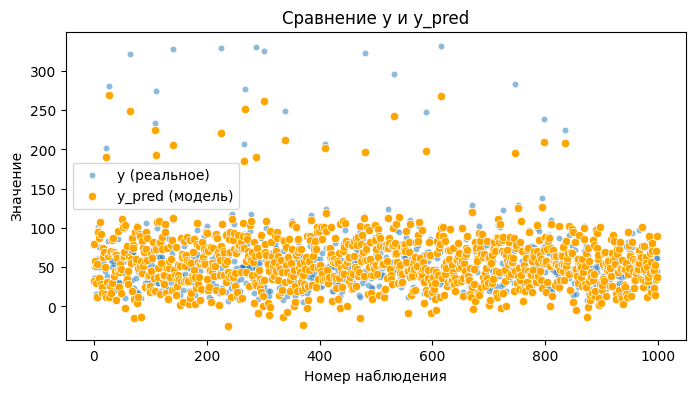

In [129]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))

# реальные значения точками
sns.scatterplot(x=range(len(y)), y=y, label="y (реальное)", alpha=0.5, s=20)

# предсказания линией
sns.scatterplot(x=range(len(y_pred)), y=y_pred, label="y_pred (модель)", color="orange")

plt.xlabel("Номер наблюдения")
plt.ylabel("Значение")
plt.title("Сравнение y и y_pred")
plt.legend()
plt.show()

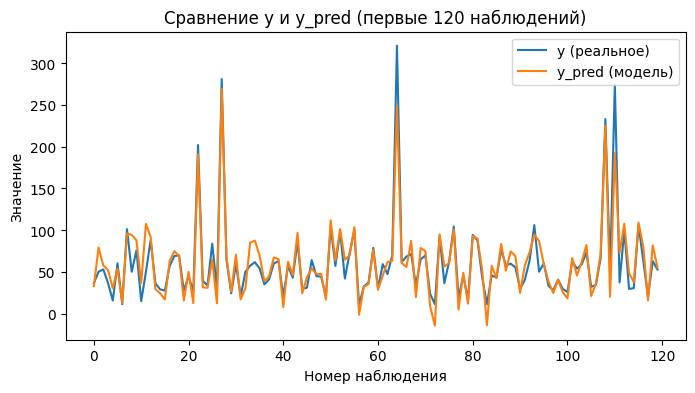

In [130]:
# ограничим диапазон
n = 120
y_small = y[:n]
y_pred_small = y_pred[:n]

plt.figure(figsize=(8, 4))
sns.lineplot(x=range(len(y_small)), y=y_small, label="y (реальное)")
sns.lineplot(x=range(len(y_pred_small)), y=y_pred_small, label="y_pred (модель)")

plt.xlabel("Номер наблюдения")
plt.ylabel("Значение")
plt.title(f"Сравнение y и y_pred (первые {n} наблюдений)")
plt.legend()
plt.show()


In [131]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score, mean_squared_error, root_mean_squared_error

In [132]:
y_pred = model.predict(X_scaled)

MAE = mean_absolute_error(y, y_pred)
print('MAE %.3f' % MAE)

MAPE = mean_absolute_percentage_error(y, y_pred)
print('MAPE=%.3f, MAPE_as_percent=%.3f%s' % (MAPE, MAPE * 100, '%'))

R2 = r2_score(y, y_pred)
print('R2=%.3f' % R2)

MSE = mean_squared_error(y, y_pred)
print('MSE=%.3f' % MSE)

RMSE = root_mean_squared_error(y, y_pred)
print('RMSE=%.3f' % RMSE)

MAE 10.214
MAPE=0.249, MAPE_as_percent=24.862%
R2=0.837
MSE=254.415
RMSE=15.950


**MAE (Mean Absolute Error)**

Считает среднюю абсолютную ошибку.
Показывает «в среднем, насколько мы ошибаемся» в единицах целевой переменной.
**Чем ближе к 0 → тем лучше.**


**MAPE (Mean Absolute Percentage Error)**

То же, что MAE, но в процентах.
Показывает среднюю ошибку в % от истинного значения.
**Чем ближе к 0% → тем лучше.**
- <10% → отлично
- 10–20% → хорошо
- 20–50% → терпимо
- 50% → плохо

**MSE (Mean Squared Error)**

Средний квадрат ошибки. Большие ошибки штрафуются сильнее.
Показывает «среднюю величину ошибки в квадрате».
**Чем ближе к 0 → тем лучше.**

**RMSE (Root Mean Squared Error)**

Корень из MSE → возвращает ошибку в тех же единицах, что и целевая переменная.
Показывает «среднюю ошибку», но учитывает, что большие промахи сильнее влияют.
**Чем ближе к 0 → тем лучше.**

**R² (Коэффициент детерминации)**
Показывает, насколько хорошо модель объясняет разброс данных.

Значение от - бесконечности до 1:

- 1 = идеально предсказывает,
- 0 = модель не лучше среднего,
- <0 = модель хуже среднего.
**Чем ближе к 1 → тем лучше.**



## Модель 2.

Использовать все признаки.
Сделать train_test_split.
Обучить на X_train, предсказать на X_train и X_test.
Вывести метрики для обучающей и тестовой выборки, интерпретировать.
Визуализировать коэффициенты и интерпретировать.

In [133]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42) # Рездляем данные как 80% - обучение, 20% на тест

model = LinearRegression()

model.fit(X_train, y_train) # обучение
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [134]:
def calculate_metrics(y_true, y_pred):

  MAE = mean_absolute_error(y_true, y_pred)
  print('MAE %.3f' % MAE)

  MAPE = mean_absolute_percentage_error(y_true, y_pred)
  print('MAPE=%.3f, MAPE_as_percent=%.3f%s' % (MAPE, MAPE * 100, '%'))

  R2 = r2_score(y_true, y_pred)
  print('R2=%.3f' % R2)

  MSE = mean_squared_error(y_true, y_pred)
  print('MSE=%.3f' % MSE)

  RMSE = root_mean_squared_error(y_true, y_pred)
  print('RMSE=%.3f' % RMSE)

In [135]:
print('метрики для выборки на которых обучалась модель')
calculate_metrics(y_train, y_train_pred)

метрики для выборки на которых обучалась модель
MAE 10.694
MAPE=0.252, MAPE_as_percent=25.192%
R2=0.844
MSE=271.877
RMSE=16.489


In [136]:
print('метрики для выборки на которых модель никогда не обучалась')
calculate_metrics(y_test, y_test_pred)

метрики для выборки на которых модель никогда не обучалась
MAE 9.798
MAPE=0.293, MAPE_as_percent=29.332%
R2=0.769
MSE=192.118
RMSE=13.861


**MAE (Mean Absolute Error)**

Считает среднюю абсолютную ошибку.
Показывает «в среднем, насколько мы ошибаемся» в единицах целевой переменной.
**Чем ближе к 0 → тем лучше.**


**MAPE (Mean Absolute Percentage Error)**

То же, что MAE, но в процентах.
Показывает среднюю ошибку в % от истинного значения.
**Чем ближе к 0% → тем лучше.**
- <10% → отлично
- 10–20% → хорошо
- 20–50% → терпимо
- 50% → плохо

**MSE (Mean Squared Error)**

Средний квадрат ошибки. Большие ошибки штрафуются сильнее.
Показывает «среднюю величину ошибки в квадрате».
**Чем ближе к 0 → тем лучше.**

**RMSE (Root Mean Squared Error)**

Корень из MSE → возвращает ошибку в тех же единицах, что и целевая переменная.
Показывает «среднюю ошибку», но учитывает, что большие промахи сильнее влияют.
**Чем ближе к 0 → тем лучше.**

**R² (Коэффициент детерминации)**
Показывает, насколько хорошо модель объясняет разброс данных.

Значение от - бесконечности до 1:

- 1 = идеально предсказывает,
- 0 = модель не лучше среднего,
- <0 = модель хуже среднего.
**Чем ближе к 1 → тем лучше.**


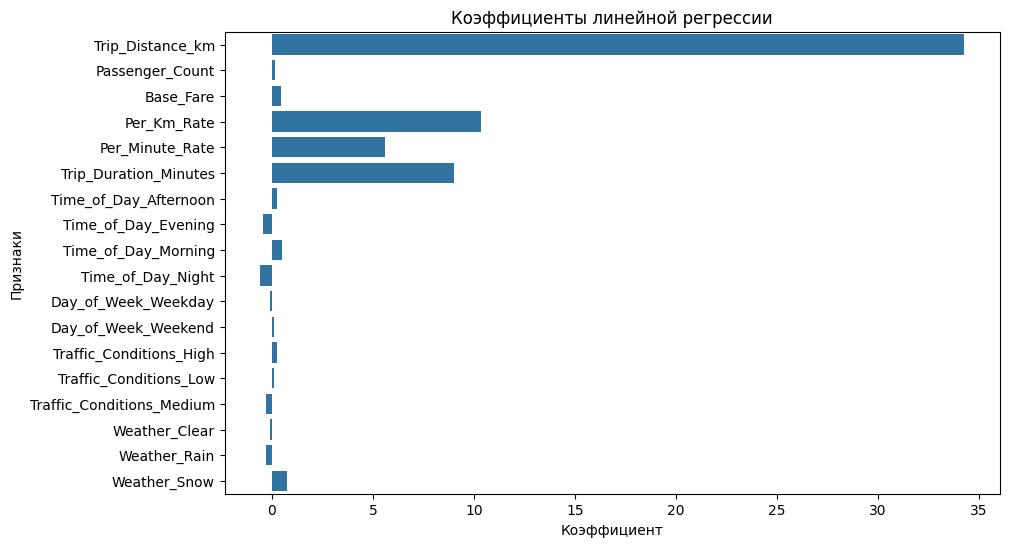

In [137]:
plt.figure(figsize=(10,6))
sns.barplot(x=model.coef_, y=X.columns, orient="h")
plt.xlabel("Коэффициент")
plt.ylabel("Признаки")
plt.title("Коэффициенты линейной регрессии")
plt.show()

## Модель 3.

Использовать только best_features (отобранные признаки).
Обучить на всей выборке.
Предсказать на всей выборке.
Вывести метрики качества и интерпретировать.
Визуализировать коэффициенты и интерпретировать.

In [138]:
#categorial_features = ['Traffic_Conditions'] # перечислить названия колонок с категориальными фичами
#numeric_features = ['Trip_Distance_km', 'Per_Km_Rate', 'Trip_Duration_Minutes'] # перечислить названия колонок с числовыми фичами
#best_features = categorial_features + numeric_features # соединение массивов

#X1 = df13[best_features]
#y1 = df13.Trip_Price

In [139]:
encoder = OneHotEncoder(sparse_output=False)  # sparse=False → выдаёт DataFrame, а не numpy матрицу
encoded = encoder.fit_transform(X1[["Traffic_Conditions"]])

In [140]:
X1_encoded = pd.DataFrame(encoded, columns=encoder.get_feature_names_out())

In [141]:
X1 = X1.drop('Traffic_Conditions', axis=1) # убираем базовую колонку
X1 = pd.concat([X1, X1_encoded], axis=1)# оставляем разные колонки

In [142]:
X1

,Trip_Distance_km,Per_Km_Rate,Trip_Duration_Minutes,Traffic_Conditions_High,Traffic_Conditions_Low,Traffic_Conditions_Medium
0,19.35,0.80,53.82,0.0,1.0,0.0
1,47.59,0.62,40.57,1.0,0.0,0.0
2,36.87,1.21,37.27,1.0,0.0,0.0
3,30.33,0.51,116.81,0.0,1.0,0.0
4,25.83,0.63,22.64,1.0,0.0,0.0
...,...,...,...,...,...,...
995,5.49,0.62,58.39,0.0,0.0,1.0
996,45.95,0.61,61.96,0.0,0.0,1.0
997,7.70,1.78,54.18,0.0,1.0,0.0
998,47.56,0.82,114.94,0.0,1.0,0.0


In [143]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X1_scaled = scaler.fit_transform(X1) # попробовать избавиться от категориальных. То ест не засовывать такие признаки в стандартизацию

In [144]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X1_scaled, y) # обучение
y_pred = model.predict(X1_scaled) # предсказываем результат


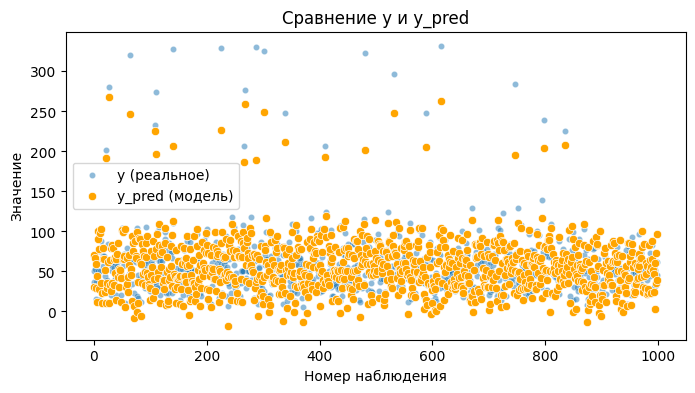

In [145]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))

# реальные значения точками
sns.scatterplot(x=range(len(y)), y=y, label="y (реальное)", alpha=0.5, s=20)

# предсказания линией
sns.scatterplot(x=range(len(y_pred)), y=y_pred, label="y_pred (модель)", color="orange")

plt.xlabel("Номер наблюдения")
plt.ylabel("Значение")
plt.title("Сравнение y и y_pred")
plt.legend()
plt.show()

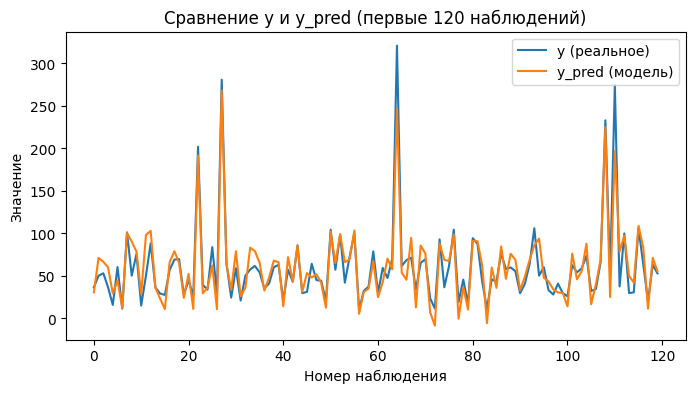

In [146]:
# ограничим диапазон
n = 120
y_small = y[:n]
y_pred_small = y_pred[:n]

plt.figure(figsize=(8, 4))
sns.lineplot(x=range(len(y_small)), y=y_small, label="y (реальное)")
sns.lineplot(x=range(len(y_pred_small)), y=y_pred_small, label="y_pred (модель)")

plt.xlabel("Номер наблюдения")
plt.ylabel("Значение")
plt.title(f"Сравнение y и y_pred (первые {n} наблюдений)")
plt.legend()
plt.show()


In [147]:
y_pred = model.predict(X1_scaled)

MAE = mean_absolute_error(y, y_pred)
print('MAE %.3f' % MAE)

MAPE = mean_absolute_percentage_error(y, y_pred)
print('MAPE=%.3f, MAPE_as_percent=%.3f%s' % (MAPE, MAPE * 100, '%'))

R2 = r2_score(y, y_pred)
print('R2=%.3f' % R2)

MSE = mean_squared_error(y, y_pred)
print('MSE=%.3f' % MSE)

RMSE = root_mean_squared_error(y, y_pred)
print('RMSE=%.3f' % RMSE)

MAE 11.826
MAPE=0.272, MAPE_as_percent=27.232%
R2=0.813
MSE=291.494
RMSE=17.073


**MAE (Mean Absolute Error)**

Считает среднюю абсолютную ошибку.
Показывает «в среднем, насколько мы ошибаемся» в единицах целевой переменной.
**Чем ближе к 0 → тем лучше.**


**MAPE (Mean Absolute Percentage Error)**

То же, что MAE, но в процентах.
Показывает среднюю ошибку в % от истинного значения.
**Чем ближе к 0% → тем лучше.**
- <10% → отлично
- 10–20% → хорошо
- 20–50% → терпимо
- 50% → плохо

**MSE (Mean Squared Error)**

Средний квадрат ошибки. Большие ошибки штрафуются сильнее.
Показывает «среднюю величину ошибки в квадрате».
**Чем ближе к 0 → тем лучше.**

**RMSE (Root Mean Squared Error)**

Корень из MSE → возвращает ошибку в тех же единицах, что и целевая переменная.
Показывает «среднюю ошибку», но учитывает, что большие промахи сильнее влияют.
**Чем ближе к 0 → тем лучше.**

**R² (Коэффициент детерминации)**
Показывает, насколько хорошо модель объясняет разброс данных.

Значение от - бесконечности до 1:

- 1 = идеально предсказывает,
- 0 = модель не лучше среднего,
- <0 = модель хуже среднего.
**Чем ближе к 1 → тем лучше.**


## Модель 4.

Использовать best_features.
Сделать train_test_split.
Обучить на X_train, предсказать на X_train и X_test.
Вывести метрики качества для обучающей и тестовой выборки, интерпретировать.
Визуализировать коэффициенты и интерпретировать.

In [148]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X1_scaled, y, test_size=0.2, random_state=42) # Рездляем данные как 80% - обучение, 20% на тест

model = LinearRegression()

model.fit(X_train, y_train) # обучение
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [149]:
def calculate_metrics(y_true, y_pred):

  MAE = mean_absolute_error(y_true, y_pred)
  print('MAE %.3f' % MAE)

  MAPE = mean_absolute_percentage_error(y_true, y_pred)
  print('MAPE=%.3f, MAPE_as_percent=%.3f%s' % (MAPE, MAPE * 100, '%'))

  R2 = r2_score(y_true, y_pred)
  print('R2=%.3f' % R2)

  MSE = mean_squared_error(y_true, y_pred)
  print('MSE=%.3f' % MSE)

  RMSE = root_mean_squared_error(y_true, y_pred)
  print('RMSE=%.3f' % RMSE)

In [150]:
print('метрики для выборки на которых обучалась модель')
calculate_metrics(y_train, y_train_pred)

метрики для выборки на которых обучалась модель
MAE 12.012
MAPE=0.272, MAPE_as_percent=27.215%
R2=0.825
MSE=304.506
RMSE=17.450


In [151]:
print('метрики для выборки на которых модель никогда не обучалась')
calculate_metrics(y_test, y_test_pred)

метрики для выборки на которых модель никогда не обучалась
MAE 12.270
MAPE=0.331, MAPE_as_percent=33.057%
R2=0.702
MSE=247.876
RMSE=15.744


**MAE (Mean Absolute Error)**

Считает среднюю абсолютную ошибку.
Показывает «в среднем, насколько мы ошибаемся» в единицах целевой переменной.
**Чем ближе к 0 → тем лучше.**


**MAPE (Mean Absolute Percentage Error)**

То же, что MAE, но в процентах.
Показывает среднюю ошибку в % от истинного значения.
**Чем ближе к 0% → тем лучше.**
- <10% → отлично
- 10–20% → хорошо
- 20–50% → терпимо
- 50% → плохо

**MSE (Mean Squared Error)**

Средний квадрат ошибки. Большие ошибки штрафуются сильнее.
Показывает «среднюю величину ошибки в квадрате».
**Чем ближе к 0 → тем лучше.**

**RMSE (Root Mean Squared Error)**

Корень из MSE → возвращает ошибку в тех же единицах, что и целевая переменная.
Показывает «среднюю ошибку», но учитывает, что большие промахи сильнее влияют.
**Чем ближе к 0 → тем лучше.**

**R² (Коэффициент детерминации)**
Показывает, насколько хорошо модель объясняет разброс данных.

Значение от - бесконечности до 1:

- 1 = идеально предсказывает,
- 0 = модель не лучше среднего,
- <0 = модель хуже среднего.
**Чем ближе к 1 → тем лучше.**


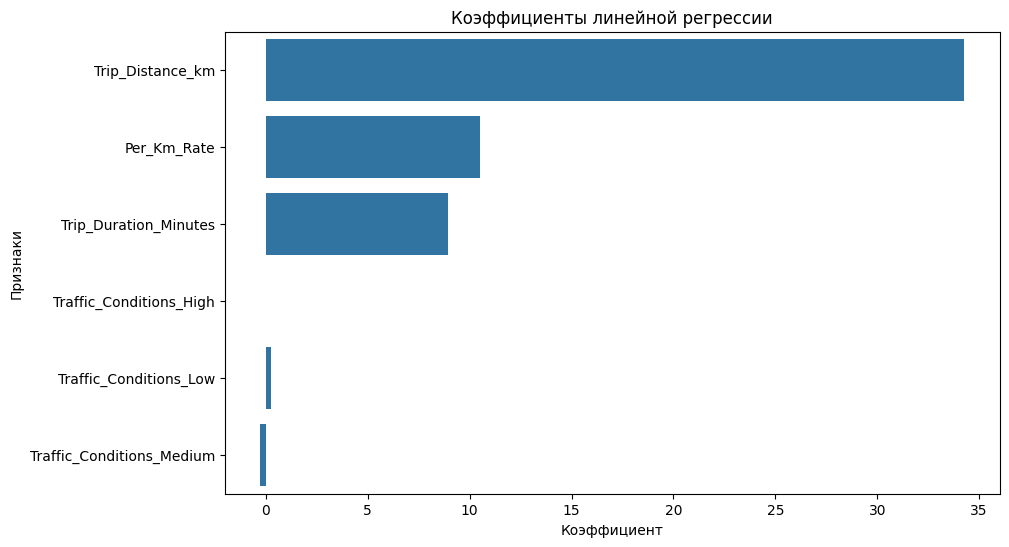

In [152]:
plt.figure(figsize=(10,6))
sns.barplot(x=model.coef_, y=X1.columns, orient="h")
plt.xlabel("Коэффициент")
plt.ylabel("Признаки")
plt.title("Коэффициенты линейной регрессии")
plt.show()

# Сравнение 4 моделей:
**1 МОДЕЛЬ:**

MAE 10.214

MAPE=0.249, MAPE_as_percent=24.862%

R2=0.837

MSE=254.415

RMSE=15.950

**2 МОДЕЛЬ:**

**метрики для выборки на которых обучалась модель**

MAE 10.694

MAPE=0.252, MAPE_as_percent=25.192%

R2=0.844

MSE=271.877

RMSE=16.489

**метрики для выборки на которых модель никогда не обучалась**

MAE 9.798

MAPE=0.293, MAPE_as_percent=29.332%

R2=0.769

MSE=192.118

RMSE=13.861


**3 МОДЕЛЬ:**

MAE 11.826

MAPE=0.272, MAPE_as_percent=27.232%

R2=0.813

MSE=291.494

RMSE=17.073

**4 МОДЕЛЬ:**

**метрики для выборки на которых обучалась модель**

MAE 12.012

MAPE=0.272, MAPE_as_percent=27.215%

R2=0.825

MSE=304.506

RMSE=17.450

**метрики для выборки на которых модель никогда не обучалась**

MAE 12.270

MAPE=0.331, MAPE_as_percent=33.057%

R2=0.702

MSE=247.876

RMSE=15.744